In [2]:
import numpy as np
from skimage.io import imshow
import skimage.io as sk
import matplotlib.pyplot as plt
from PIL import Image

### Helper Functions

In [3]:
def color_map(N=256, normalized=False):
    def bitget(byteval, idx):
        return ((byteval & (1 << idx)) != 0)

    dtype = 'float32' if normalized else 'uint8'
    cmap = np.zeros((N, 3), dtype=dtype)
    for i in range(N):
        r = g = b = 0
        c = i
        for j in range(8):
            r = r | (bitget(c, 0) << 7-j)
            g = g | (bitget(c, 1) << 7-j)
            b = b | (bitget(c, 2) << 7-j)
            c = c >> 3

        cmap[i] = np.array([r, g, b])

    cmap = cmap/255 if normalized else cmap
    return cmap

def color_map_viz():
    ### intialize labels
    labels = ['Background', 
         'Fixed-wing Aircraft',
         'Small Aircraft',
         'Cargo Plane',
         'Helicopter',
         'Passenger Vehicle',
         'Small Car',
         'Bus',
         'Pickup Truck',
         'Utility Truck',
         'Truck',
         'Cargo Truck',
         'Truck w/Box',
         'Truck Tractor',
         'Trailer',
         'Truck w/Flatbed',
         'Truck w/Liquid',
         'Crane Truck',
         'Railway Vehicle',
         'Passenger Car',
         'Cargo Car',
         'Flat Car',
         'Tank car',
         'Locomotive',
         'Maritime Vessel',
         'Motorboat',
         'Sailboat',
         'Tugboat',
         'Barge',
         'Fishing Vessel',
         'Ferry',
         'Yacht',
         'Container Ship',
         'Oil Tanker',
         'Engineering Vehicle',
         'Tower crane',
         'Container Crane',
         'Reach Stacker',
         'Straddle Carrier',
         'Mobile Crane',
         'Dump Truck',
         'Haul Truck',
         'Scraper/Tractor',
         'Front loader/Bulldozer',
         'Excavator',
         'Cement Mixer',
         'Ground Grader',
         'Hut/Tent',
         'Shed',
         'Building',
         'Aircraft Hangar',
         'Damaged Building',
         'Facility',
         'Construction Site',
         'Vehicle Lot',
         'Helipad',
         'Storage Tank',
         'Shipping container lot',
         'Shipping Container',
         'Pylon',
         'Tower']
    
    ### intialize values 
    nclasses = 61
    row_size = 50
    col_size = 500
    c2c_dic = {}
    
    cmap = color_map()
    array = np.empty((row_size*(nclasses+1), col_size, cmap.shape[1]), dtype=cmap.dtype)
    for i in range(nclasses):
        array[i*row_size:i*row_size+row_size, :] = cmap[i]
        c2c_dic[labels[i]] = cmap[i]
    array[nclasses*row_size:nclasses*row_size+row_size, :] = cmap[-1]
    imshow(array)
    plt.yticks([row_size*i+row_size/2 for i in range(nclasses+1)], labels)
    plt.xticks([])
    plt.show()
    return c2c_dic

### Get Class to Color Dictionary and Display Color Map

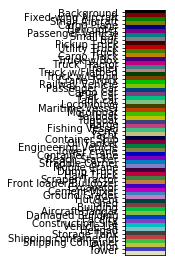

Number of labels:  61


{'Background': array([0, 0, 0], dtype=uint8),
 'Fixed-wing Aircraft': array([128,   0,   0], dtype=uint8),
 'Small Aircraft': array([  0, 128,   0], dtype=uint8),
 'Cargo Plane': array([128, 128,   0], dtype=uint8),
 'Helicopter': array([  0,   0, 128], dtype=uint8),
 'Passenger Vehicle': array([128,   0, 128], dtype=uint8),
 'Small Car': array([  0, 128, 128], dtype=uint8),
 'Bus': array([128, 128, 128], dtype=uint8),
 'Pickup Truck': array([64,  0,  0], dtype=uint8),
 'Utility Truck': array([192,   0,   0], dtype=uint8),
 'Truck': array([ 64, 128,   0], dtype=uint8),
 'Cargo Truck': array([192, 128,   0], dtype=uint8),
 'Truck w/Box': array([ 64,   0, 128], dtype=uint8),
 'Truck Tractor': array([192,   0, 128], dtype=uint8),
 'Trailer': array([ 64, 128, 128], dtype=uint8),
 'Truck w/Flatbed': array([192, 128, 128], dtype=uint8),
 'Truck w/Liquid': array([ 0, 64,  0], dtype=uint8),
 'Crane Truck': array([128,  64,   0], dtype=uint8),
 'Railway Vehicle': array([  0, 192,   0], dtype=ui

In [6]:
### make colormap 
c2c_dic = color_map_viz()

### convert to array 
palettes = np.asarray([i for i in c2c_dic.values()])
print('Number of labels: ', len(palettes))

### view colormap
c2c_dic

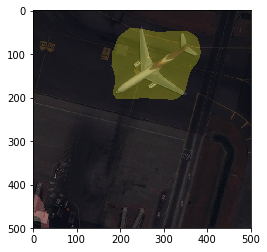

In [11]:
### select image id
img_id = 665

### get images 
orig_path = './og_imgs/'+ str(img_id) + '.jpg'
seg_img_path = './new_seg_imgs/' + str(seg_id) + '.png'

### get original 
o_image = Image.open(original)
o_image = np.asarray(o_image)

### get segmentation 
seg = Image.open(seg_img_path)
seg = np.asarray(seg)

### create colored mask using palletes array 
img = Image.fromarray(palettes[seg])

### visualize mask 
plt.imshow(o_image)
plt.imshow(img, cmap='jet', alpha=0.5)